# AI & ML Internship – Task 4  
## Feature Encoding & Scaling (Outstanding Performance)

**Dataset Used:** Adult Income Dataset  
**Tools Used:** Python, Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn  

### Objective  
To convert raw categorical and numerical features into a fully numerical, scaled, and machine-learning-ready dataset using proper encoding and scaling techniques.


In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

sns.set(style="whitegrid")


In [12]:

# Load dataset
df = pd.read_csv("adult.csv")
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## 1. Dataset Overview

In [13]:
df.shape

(48842, 15)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB



## 2. Feature Type Identification

### Numerical Features
- age  
- fnlwgt  
- education-num  
- capital-gain  
- capital-loss  
- hours-per-week  

### Categorical Features
- workclass  
- education  
- marital-status  
- occupation  
- relationship  
- race  
- sex  
- native-country  

### Target Variable
- income


## 3. Handling Missing Values (if any)

In [15]:

df.replace(' ?', np.nan, inplace=True)
df.isnull().sum()


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [16]:

df.dropna(inplace=True)
df.shape


(48842, 15)


## 4. Label Encoding (Target Variable)
Label Encoding is applied where order exists.


In [17]:

le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])
df['income'].value_counts()


income
0    37155
1    11687
Name: count, dtype: int64


## 5. One-Hot Encoding (Categorical Features)
One-Hot Encoding is applied where no natural order exists.


In [18]:

categorical_cols = [
    'workclass','education','marital-status','occupation',
    'relationship','race','gender','native-country'
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,40,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,7688,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,30,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False



## 6. Scaling Numerical Features
StandardScaler is used to standardize numerical features.


In [20]:

num_cols = ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

df_encoded[num_cols].describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04
mean,2.281092e-16,-5.848208e-17,-9.208746e-17,1.047440e-17,-1.018345e-17,4.466169e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.578629e+00,-1.679680e+00,-3.531030e+00,-1.448035e-01,-2.171271e-01,-3.181452e+00
25%,-7.763164e-01,-6.828752e-01,-4.193353e-01,-1.448035e-01,-2.171271e-01,-3.408696e-02
50%,-1.198790e-01,-1.090844e-01,-3.037346e-02,-1.448035e-01,-2.171271e-01,-3.408696e-02
75%,6.824334e-01,4.543232e-01,7.475502e-01,-1.448035e-01,-2.171271e-01,3.694214e-01
max,3.745808e+00,1.231723e+01,2.303397e+00,1.327438e+01,1.059179e+01,4.727312e+00



## 7. Before vs After Scaling Comparison


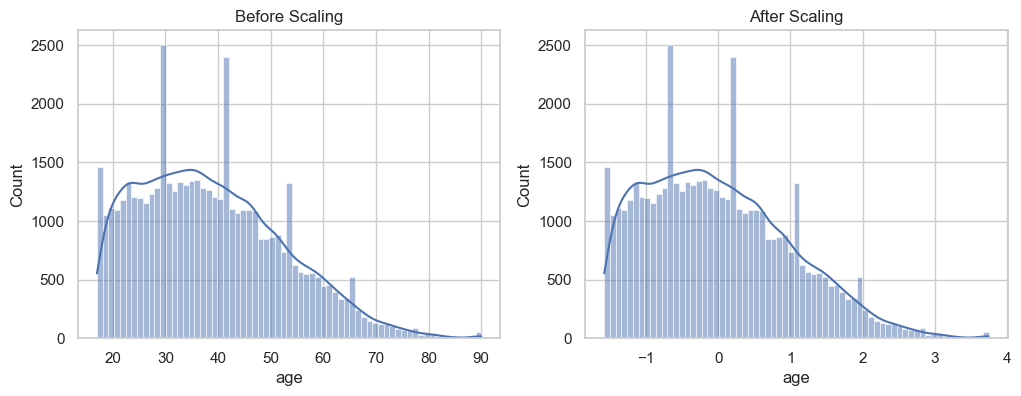

In [21]:

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['age'], kde=True)
plt.title("Before Scaling")

plt.subplot(1,2,2)
sns.histplot(df_encoded['age'], kde=True)
plt.title("After Scaling")
plt.show()



### Insight
Scaling centers the data around zero and standardizes variance, improving performance for distance-based and gradient-based algorithms.



## 8. ML Readiness Checklist
- All categorical features encoded  
- All numerical features scaled  
- No missing values  
- Fully numerical dataset  



## 9. Save Preprocessed Dataset


In [22]:

df_encoded.to_csv("adult_income_processed.csv", index=False)



## Final Conclusion
The Adult Income dataset has been successfully transformed into a machine-learning-ready format using proper encoding and scaling techniques. This preprocessing step is essential for building accurate and efficient ML models.
